In [1]:
from os import listdir

directory  = './Data/bioc-FH-training/'
file_list  = listdir(directory)
file_names = set([file.split('.')[0] for file in file_list if file != '' and file.endswith('txt')])
file_num   = len(file_names)

print(len(file_names), "data files in all.")
print(file_names)

99 data files in all.
{'doc_138', 'doc_177', 'doc_49', 'doc_66', 'doc_126', 'doc_123', 'doc_26', 'doc_145', 'doc_62', 'doc_118', 'doc_28', 'doc_76', 'doc_140', 'doc_81', 'doc_154', 'doc_10', 'doc_164', 'doc_17', 'doc_13', 'doc_52', 'doc_60', 'doc_11', 'doc_7', 'doc_31', 'doc_2', 'doc_41', 'doc_178', 'doc_162', 'doc_42', 'doc_101', 'doc_19', 'doc_16', 'doc_6', 'doc_12', 'doc_54', 'doc_130', 'doc_104', 'doc_132', 'doc_139', 'doc_58', 'doc_35', 'doc_166', 'doc_80', 'doc_169', 'doc_124', 'doc_1', 'doc_142', 'doc_57', 'doc_147', 'doc_161', 'doc_95', 'doc_148', 'doc_160', 'doc_67', 'doc_115', 'doc_53', 'doc_24', 'doc_18', 'doc_93', 'doc_23', 'doc_85', 'doc_43', 'doc_97', 'doc_91', 'doc_170', 'doc_152', 'doc_29', 'doc_40', 'doc_121', 'doc_150', 'doc_94', 'doc_34', 'doc_136', 'doc_86', 'doc_143', 'doc_156', 'doc_157', 'doc_105', 'doc_79', 'doc_167', 'doc_117', 'doc_21', 'doc_59', 'doc_74', 'doc_111', 'doc_50', 'doc_174', 'doc_155', 'doc_14', 'doc_37', 'doc_176', 'doc_173', 'doc_36', 'doc_92', 

# Parse xml files

In [2]:
import xml.etree.ElementTree
import codecs
import chardet

## Types
phi = 0
age = []
observation   = []
living_status  = []
family_member = []

## Properties
# for Family Member
relation = []
count    = []
blood    = []
adopted  = []
side_of_family = []

# for Observation
negation    = []
certainty   = []
is_all      = []
obser_len   = []
obser_names = []

# for living status
alive = []
healthy = []
chain = []

for file_name in file_names:
    #ff = open(directory + file_name +'.txt', 'rb')
    #print(directory + file_name +'.txt', chardet.detect(ff.read())['encoding'])
    #ff.close()
    
    file_path = directory + file_name + '.xml'
    
    e = xml.etree.ElementTree.parse(file_path).getroot()
    annotation = e.findall('annotations')[0]

    for entity in annotation.findall('entity'):
        typee = entity.find('type')

        properties = entity.findall('properties')[0] if entity.findall('properties') else []

        if typee.text == 'FamilyMember':
            #print(entity.findall('properties')[0].getchildren())
            family_member.append(typee.text)
            relation.append(properties.findall('Relation')[0].text)
            count.append(properties.findall('Count')[0].text)
            side_of_family.append(properties.findall('SideOfFamily')[0].text)
            blood.append(properties.findall('Blood')[0].text)
            adopted.append(properties.findall('Adopted')[0].text)
            
        elif typee.text == 'Observation':
            #print(entity.findall('properties')[0].getchildren())
            temp = entity.findall('span')[0].text.split(';')[0].split(',')
            temp = list(map(int, temp))
            
            f = open(directory + file_name +'.txt')
            observ = ''
            f.read(temp[0])
            observ = f.read(temp[1]-temp[0])
            f.close()
            
            obser_names.append(observ) # .strip()
            obser_len.append(temp[1]-temp[0])
            observation.append(typee.text)
            negation.append(properties.findall('Negation')[0].text)        
            certainty.append(properties.findall('Certainty')[0].text)
            is_all.append(properties.findall('isAll')[0].text)
        #elif typee.text == 'Age':
        #    print(entity.findall('properties')[0].findall('AgeType')[0].text)
        #    age.append(text)
        elif typee.text == 'LivingStatus':
#             print(entity.findall('properties')[0].getchildren())
            alive_txt = entity.findall('properties')[0].findall('Alive')[0].text
            health_txt = entity.findall('properties')[0].findall('Healthy')[0].text
            alive.append(alive_txt)
            healthy.append(health_txt)
            living_status.append((alive_txt, health_txt))
        #elif text == 'PHI':
        #    print(entity.findall('properties')) #[0].getchildren())
        #    phi += 1
        #else:
        #    print(entity.find('type').text)

    for relation_ in annotation.findall('relation'):
        text = relation_.find('type').text
        if text == 'Chain':
            chain.append(text)
        else:
            print(relation_.find('type').text)
    #print(obser_names, '\n')
    #obser_names = []

# 每个chain properties个数分布/平均

# counting

In [3]:
import collections

# family member stat
relation_c       = collections.Counter(relation)
count_c          = collections.Counter(count)
side_of_family_c = collections.Counter(side_of_family)
blood_c          = collections.Counter(blood)
adopted_c        = collections.Counter(adopted)
print('FamilyMember -', len(family_member), 'times and',
      len(family_member)/file_num, 'times in avg for each file')
print('\nrelation:\n', relation_c)
print('Count:\n', count_c)
print('side_of_family:\n', side_of_family_c)
print('blood:\n', blood_c)
#print('adopted\t:', adopted_c) # All 'NA'

FamilyMember - 803 times and 8.11111111111111 times in avg for each file

relation:
 Counter({'Aunt': 99, 'Mother': 89, 'Father': 86, 'Sister': 80, 'Uncle': 75, 'Brother': 71, 'Grandmother': 65, 'Cousin': 57, 'Grandfather': 55, 'Son': 46, 'Daughter': 44, 'Sibling': 15, 'Child': 14, 'Grandparent': 6, 'Parent': 1})
Count:
 Counter({None: 609, '2': 82, '3': 54, '4': 19, '1': 14, '5': 10, '7': 6, '10': 4, '6': 2, '9': 1, '15': 1, '8': 1})
side_of_family:
 Counter({'NA': 456, 'Maternal': 180, 'Paternal': 166, None: 1})
blood:
 Counter({'Blooded': 780, 'Half-blooded': 19, 'Non-blooded': 4})


In [4]:
# observation stat
negation_c  = collections.Counter(negation)
certainty_c = collections.Counter(certainty)
is_all_c    = collections.Counter(is_all)
obser_len_c = collections.Counter(obser_len)
print('Observation -', len(observation), 'times and',
      len(observation)/file_num, 'times in avg for each file')
print('negation\t:', negation_c)
print('certainty\t:', certainty_c)
print('is_all\t\t:', is_all_c)
#print('obser_len\t:', obser_len_c)

Observation - 978 times and 9.878787878787879 times in avg for each file
negation	: Counter({'No': 729, 'Yes': 249})
certainty	: Counter({'Certain': 946, 'Uncertain': 32})
is_all		: Counter({'False': 780, 'True': 198})


In [5]:
# living status stat
alive_c = collections.Counter(alive)
healthy_c = collections.Counter(healthy)
print('LivingStatus -', len(living_status), 'times and',
      len(living_status)/file_num, 'times in avg for each file')
print('alive\t:', alive_c)
print('healthy\t:', healthy_c)

LivingStatus - 415 times and 4.191919191919192 times in avg for each file
alive	: Counter({'Yes': 222, 'No': 193})
healthy	: Counter({'NA': 243, 'Yes': 172})


In [20]:
def stat_living_status(living_status):
    # died or unhealthy, either alive or healthy is NA, alive and healty, respectively
    ls0, ls2, ls4 = 0, 0, 0
    
    print(len(living_status))
    for alive, health in living_status:
        alive, health = alive.lower(), health.lower()
        if alive == health == "yes":
            ls4 += 1
        elif alive == "no" or health == "no":
            ls0 += 1
        else:
            ls2 += 1
    return ls0, ls2, ls4

ls0, ls2, ls4 = stat_living_status(living_status)
print("LS0 - Died or unhealthy:", ls0)
print("LS2 - Alive or healthy status is 'NA' - LS2:", ls2)
print("LS4 - Alive and healthy - LS4:", ls4)

415
LS0 - Died or unhealthy: 193
LS2 - Alive or healthy status is 'NA' - LS2: 52
LS4 - Alive and healthy - LS4: 170


In [7]:
chain_c = collections.Counter(chain)
print('Chain:', len(chain))
print(chain_c)

Chain: 665
Counter({'Chain': 665})


# Visualize

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

print('There are', len(relation_c), 'kinds of family members in all.')
print('Each Family Member showed', len(relation)/len(relation_c), 'in average.')
plt.figure(figsize=(18,5))
plt.xticks(range(len(relation_c.keys())),relation_c.keys())
plt.bar(range(len(relation_c.keys())),relation_c.values())
plt.title('Frequency of Family Members', fontsize=16)
plt.xlabel('Family Members', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

There are 15 kinds of family members in all.
Each Family Member showed 53.53333333333333 in average.


<Figure size 1800x500 with 1 Axes>

The average length of disease name is 13.932515337423313 characters.


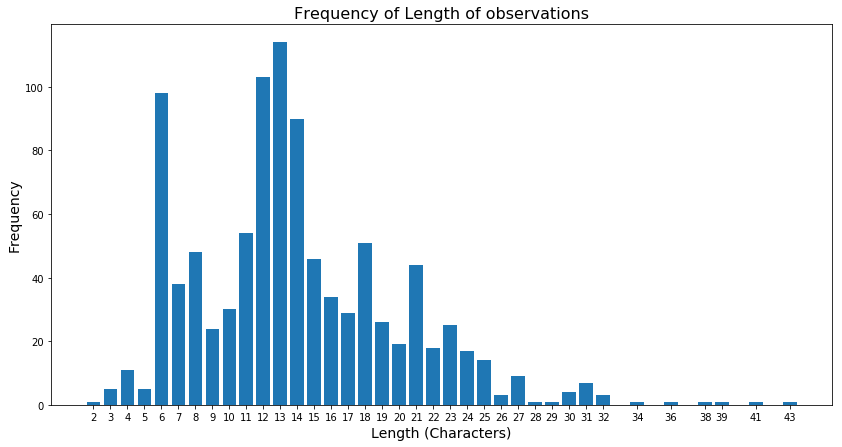

In [9]:
print('The average length of disease name is', sum(obser_len)/len(obser_len), 'characters.')
plt.figure(figsize=(14,7))
plt.bar(list(obser_len_c.keys()), list(obser_len_c.values()), tick_label=list(obser_len_c.keys()))
plt.title('Frequency of Length of observations', fontsize=16)
plt.xlabel('Length (Characters)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [10]:
# TODO: length in words

Counter({1: 594, 2: 35, 3: 20, 4: 11, 6: 4, 9: 4, 5: 3, 8: 3, 12: 2, 33: 1, 14: 1, 11: 1, 19: 1, 10: 1})
There are 978 diseases observed in all.


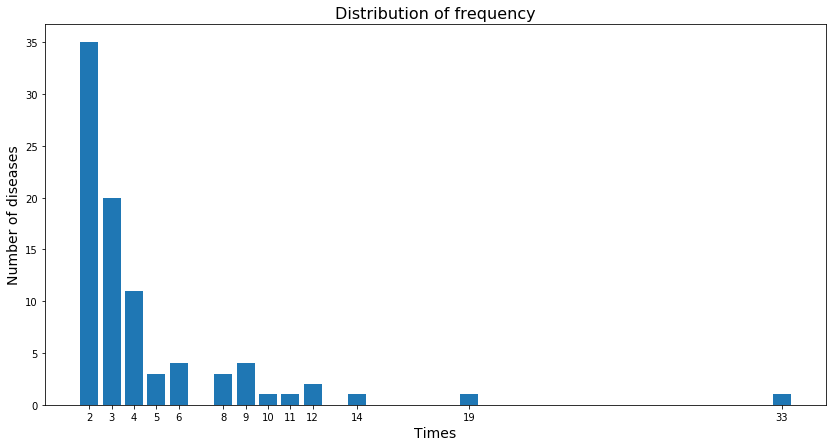

In [11]:
obser_names_c = collections.Counter(obser_names)
obser_stat = collections.Counter(obser_names_c.values())

print(obser_stat)
print('There are', len(obser_names), 'diseases observed in all.')
plt.figure(figsize=(14,7))
plt.bar(list(obser_stat.keys())[1:], list(obser_stat.values())[1:], tick_label=list(obser_stat.keys())[1:])
plt.title('Distribution of frequency', fontsize=16)
plt.xlabel('Times', fontsize=14)
plt.ylabel('Number of diseases', fontsize=14)
plt.show()

In [12]:
print(obser_names_c)

Counter({'cancer': 33, 'asthma': 19, 'smoker': 14, 'cholera': 12, 'mental retardation': 12, 'learning disabilities': 11, 'hypertension': 10, 'heart disease': 9, 'birth defects': 9, 'heart issues': 9, 'cancers': 9, 'hemophilia': 8, 'low platelets': 8, 'hypothyroidism': 8, 'prophylactic mastectomy': 6, 'hypermnesia': 6, 'multiple miscarriages': 6, 'type 2 diabetes': 6, 'CCHF': 5, 'renal disease': 5, 'heart murmur': 5, 'malaria': 4, 'skin cancer': 4, 'pelvic cancer': 4, 'stroke': 4, 'leukemia': 4, 'cysticercosis': 4, 'corbus': 4, 'fainting': 4, 'blood pressure': 4, 'heart attack': 4, ' schizophrenia': 4, 'DKA': 3, 'multiple sclerosis': 3, 'diabetes': 3, 'COPD': 3, 'alzheimer disease': 3, 'type 2 diabetes ': 3, 'miscarriages': 3, 'enamel caries': 3, 'dwarfism': 3, 'uterine cancer': 3, 'umbilical cord anomaly': 3, 'acromioclavicular infection': 3, 'schizophrenia': 3, 'neonatal death': 3, 'schizophrenia ': 3, 'depressed': 3, 'thalassemia': 3, 'hysterectomy': 3, 'heavy smoker': 3, 'allergies'